# Working with simple mats 

This is where it starts, we start opencv pure mat object with matrix of pixel values.

In [1]:
(ns calm-galaxy
  (:require
    [opencv4.core :refer :all]
    [opencv4.colors.rgb :as rgb]
    [opencv4.utils :as u]))

nil

You can think of image containers in OpenCV as matrices. You usually define them with a number of rows, a number of columns and a type. 
The type defines what kind of content each pixel can receive. 

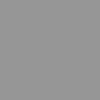

In [2]:
(def a (new-mat 100 100 CV_8UC3 (new-scalar 150 150 150)))
(u/>>> a)

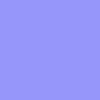

In [3]:
(-> (new-mat 100 100 CV_8UC3)
    (set-to (new-scalar 250 150 150))
	(u/>>>))

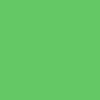

In [4]:
(-> 
  (new-mat 100 100 CV_8UC3 (new-scalar 100 200 100))
  (u/>>>))

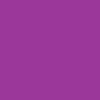

In [5]:
(-> 
  (new-mat 100 100 CV_8UC3 (new-scalar 100 200 100))
  (bitwise-not!)
  (u/>>>))

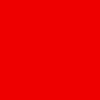

In [6]:
(u/>>>
  (new-mat 100 100 CV_8UC3 rgb/red-2))

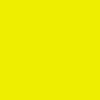

In [11]:
(u/>>>
  (new-mat 100 100 CV_8UC3 rgb/yellow-2))

In [8]:
(println rgb/yellow-2)
(.dump (new-mat 3 3 CV_8UC3 rgb/yellow-2))

#object[org.opencv.core.Scalar 0x7211b650 [0.0, 238.0, 238.0, 0.0]]


"[  0, 238, 238,   0, 238, 238,   0, 238, 238;\n   0, 238, 238,   0, 238, 238,   0, 238, 238;\n   0, 238, 238,   0, 238, 238,   0, 238, 238]"

In [12]:
(def a (new-mat 3 3 CV_8UC3))

(.put a 0 1 (byte-array [0 238 238]))
(.put a 0 2 (byte-array [0 238 238]))

(.put a 1 0 (byte-array [0 238 238]))
(.put a 1 1 (byte-array [0 238 238]))
(.put a 1 2 (byte-array [0 238 238]))

(.put a 2 0 (byte-array [0 238 238]))
(.put a 2 1 (byte-array [0 238 238]))
(.put a 2 2 (byte-array [0 238 238]))
(u/>>> a)

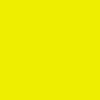

In [13]:

(def row 100)
(def col 100)
(def yellow (byte-array [0 238 238]) )

(def a (new-mat row col CV_8UC3))

(dotimes [i row]
  (dotimes [j col]
	 (.put a i j yellow)))

(u/>>> a)

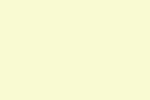

In [14]:
(def row 100)
(def col 150)
(defn scalar->bytes [s]
  (byte-array (take 3 (.val s ))))

(def yellow (scalar->bytes (new-scalar 210 250 250)))

(def a (new-mat row col CV_8UC3))

(dotimes [i row]
  (dotimes [j col]
	 (.put a i j yellow)))

(u/>>> a)

In [15]:
(defn matrix-to-mat [matrix]
  (let [ row (count matrix) col (count (first matrix)) b (new-mat row col CV_8UC3)]
   (dotimes [i row]
    (dotimes [j col ]
	 (.put b i j (scalar->bytes (nth (nth matrix i) j )))))
  b
  ))

#'calm-galaxy/matrix-to-mat

In [17]:
(u/>>>
  (matrix-to-mat [ 
   [rgb/red-2 rgb/red-2 rgb/blue rgb/blue] 
   [rgb/red-2 rgb/red-2 rgb/blue rgb/blue]  
   [rgb/red-2 rgb/red-2 rgb/blue rgb/blue] ]))

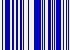

In [19]:
(u/>>>
  (matrix-to-mat 
    (into [] 
      (clojure.core/repeat 50 
		(clojure.core/take 70 (repeatedly #(rand-nth [rgb/blue-3 rgb/beige])))))))